In [1]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
def open_file(path_file):
    #Function opening and creating a pandas dataframe from the entry dataset
    #This function take for parameter:
    #   -path_file: The path of the entry dataset inside the computer directory
    #This function return the pandas dataframe created
    df=pd.read_csv(path_file,names=['x','y'])
    return df #Return the pandas dataframe df

In [3]:
def compute_sklearn(df):
    #Function computing using the sklearn library the coefficients a & b for the linear regression
    #This function take for parameter:
    #   -df: Pandas dataframe create from the entry dataset of diabetes.csv
    #        The columns are "x" and "y" inside the dataframe
    #This function return the two coefficient a & b in this order
    #reshape the data because the sklearn library take a 2D array in entry to execute the linear regression
    sk_x=df["x"].values.reshape(-1,1)
    sk_y=df["y"].values.reshape(-1,1)
    linear_regression = LinearRegression()
    linear_regression.fit(sk_x,sk_y)
    return linear_regression.coef_[0][0], linear_regression.intercept_[0] #Return the a & b parameter

In [4]:
def compute_coeffs(df):
    #Function computing using manual method the coefficient a & b for the linear regression
    #This function take for parameter:
    #   -df: Pandas dataframe create from the entry dataset of diabetes.csv
    #        The columns are "x" and "y" inside the dataframe
    #This function return the two coefficient a & b in this order
    sum1,sum2=0,0
    xmean=np.mean(df['x'])
    ymean=np.mean(df['y'])
    for index, row in df.iterrows():
        sum1+=(row['x']-xmean)*(row['y']-ymean)
        sum2+=(row['x']-xmean)**2
    return  sum1/sum2, ymean-(sum1/sum2)*xmean  #Return the a & b parameter

In [5]:
def plot(df,a_manual,b_manual,a_sklearn,b_sklearn):
    #Function plotting two graph, one with the manual compute coefficients, one with the sklearn compute coefficient
    #This function take for parameter:
    #   - df: The dataframe with the entry data of diabetes.csv
    #   - a_manual: a coefficient manually computed
    #   - b_manua;: b coefficient manually computed
    #   - a_sklearn: a coefficient computed by the sklearn library
    #   - b_sklearn: b coefficient computed by the sklearn library
    #This function is not returning anything
    #Set the default Seaborn theme environment for better visibility of graph, import grid, gray background
    sns.set_theme()
    #Create the two outcomes for the plot
    y_sklearn=(a_sklearn*df['x']+b_sklearn)
    y_manual=(a_manual*df['x']+b_manual)
    fig,axes =plt.subplots(1,2,figsize=(10,5)) #Create 2 graph side by side, set the size
    #Creating the first graph with the manual computed coefficients and the dataset, setting the x/y label, title and legend
    axes[0].set_title("Manual Linear Regression of diabete dataset")
    axes[0].scatter(df['x'],df['y'],color='r',label="Diabete dataset")
    axes[0].plot(df['x'],y_manual,color='y',label="Manual: %f*x+%f" % (a_manual,b_manual))
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')
    axes[0].legend()
    #Creating the second graph with the sklearn computed coefficients and the dataset, setting the x/y label, title and legend
    axes[1].set_title("Sklearn Linear Regression of diabete dataset")
    axes[1].scatter(df['x'],df['y'],color='r',label="Diabete dataset")
    axes[1].plot(df['x'],y_sklearn,color='b',label="sklearn: %f*x+%f" % (a_sklearn,b_sklearn))
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('y')
    axes[1].legend()

    plt.tight_layout() #Make sure the graphs are not overlapping each others


In [6]:
def evaluate_model(df,a_manual,b_manual):
    #Function evaluation the model of the linear regression made earlier, it will give us parameter to be able to assess the precision and accuracy of our results
    #This function take for arguments:
    #   - df: The dataframe with the entry data of diabetes.csv
    #   - a_manual: the parameter a of the linear regression calculate manually
    #   - b_manual: the parameter b of the linear regression calculate manually
    #This function is not returning anything but printing in the console the results
    #Calculate y(x) from the linear regression parameter to compare with the real y(x) and assess the accuracy of our model
    y_manual=df['x']*a_manual+b_manual
    print("***  MODEL EVALUATION  ***\na_manual: %f\nb_manual: %f\n**************************" %(a_manual,b_manual))
    #Calculate MAE parameter
    sum=0
    for index, row in df.iterrows():
        sum+=abs(row['y']-y_manual[index])
    MAE=sum/100
    print("MAE: %f" %MAE)
    #Calculate MSE parameter
    sum=0
    for index, row in df.iterrows():
        sum+=(row['y']-y_manual[index])**2
    MSE=sum/100
    print("MSE: %f" %MSE)
    #Calculate RMSE parameter
    sum=0
    for index, row in df.iterrows():
        sum+=(row['y']-y_manual[index])**2
    RMSE=(sum/100)**0.5
    print("RMSE: %f" %RMSE)
    #Verify my computation methods with the library methods from sklearn
    # from sklearn.metrics import mean_absolute_error
    # print("MAE",mean_absolute_error(df['y'],y_manual))
    # from sklearn.metrics import mean_squared_error
    # print("MSE",mean_squared_error(df['y'],y_manual))
    # print("RMSE",np.sqrt(mean_squared_error(df['y'],y_manual)))

***  MODEL EVALUATION  ***
a_manual: 831.767374
b_manual: 142.327327
**************************
MAE: 49.234934
MSE: 3568.636529
RMSE: 59.738066
**************************
Execution time: 0.06692695617675781 seconds


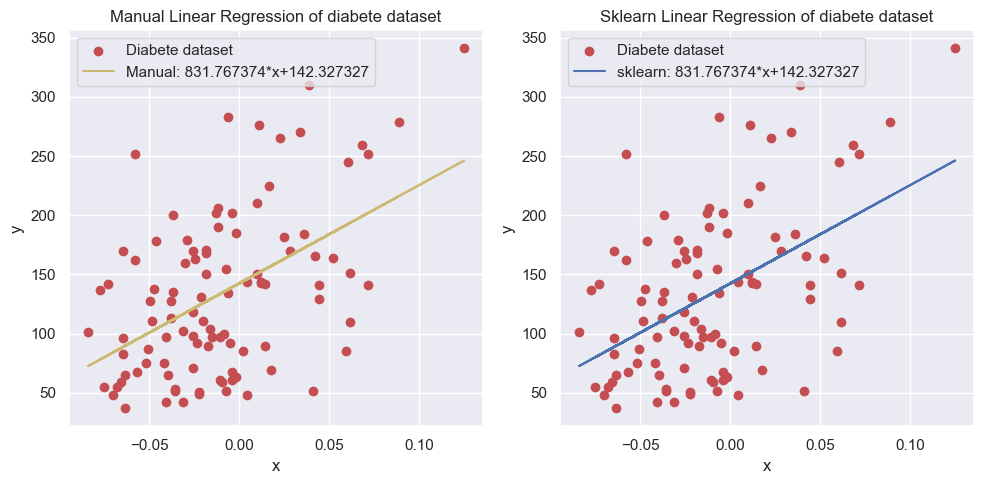

In [7]:
if __name__ == '__main__':
    #Main function of the MiniProject_main.ipynb
    st = time.time() # get the start time
    path_file="diabetes.csv" #Defining the path of the entry data
    df=open_file(path_file) #Open and defining the dataset from the entry data file
    a_manual,b_manual =compute_coeffs(df) #Compute manually the coefficient of the linear regression
    a_sklearn,b_sklearn = compute_sklearn(df) #Compute using the sklearn library the coefficient of the linear regression
    plot(df,a_manual,b_manual,a_sklearn,b_sklearn) #Plot the graphs from the result obtained
    evaluate_model(df,a_manual,b_manual) #Evaluate the model
    et = time.time() # get the end time
    elapsed_time = et - st # get the execution time
    print('**************************\nExecution time:', elapsed_time, 'seconds')


Text(0, 0.5, 'y')

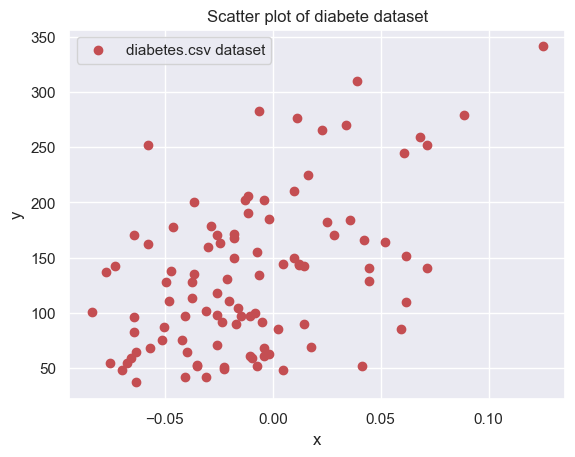

In [8]:
#Scatter plot without linear regression
plt.scatter(df['x'],df['y'],label="diabetes.csv dataset",color='r')
plt.title("Scatter plot of diabete dataset")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

In [9]:
#Correlation matrix of the x,y in the diabete.csv dataset
display(df.corr())

,x,y
x,1.000000,0.496585
y,0.496585,1.000000


<Figure size 20000x20000 with 0 Axes>

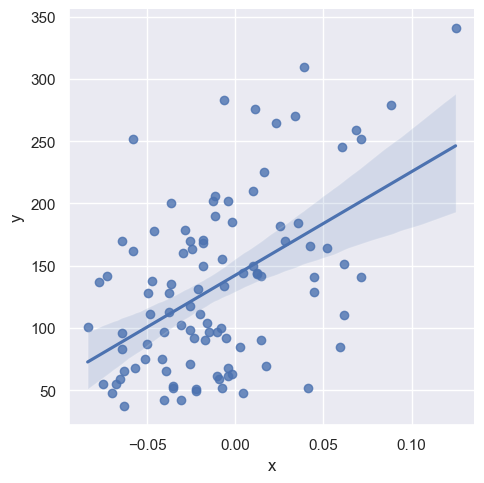

In [17]:
#Seaborn linear regression library build-in function
plt.figure(figsize=(200,200))
sns.lmplot(x="x",y="y",data=df)